**[Back to Fan's Intro Stat Table of Content](https://fanwangecon.github.io/Stat4Econ/)**

# Single Variable Basic Graphs and Tables

## Load Packages and Data

### Packages

We will continue to rely on various [tidyverse](https://www.tidyverse.org/). Now including: [ggplot](https://ggplot2.tidyverse.org/reference/ggplot.html), [readr](https://readr.tidyverse.org/), along with [dplyr](https://dplyr.tidyverse.org/) and [tibble](https://tibble.tidyverse.org/), which we used for the [in-class survey](https://fanwangecon.github.io/Stat4Econ/survey/classsurvey.html) already.

We will also use the [knitr](https://yihui.name/knitr/) Package, which allows for prettified outputs.

In [23]:
# For Data Structures
library(tibble)
# For Data Manipulations
library(dplyr)
# For Reading/Loading Data
library(readr)
# For plotting
library(ggplot2)
# For Additional table output 
# install.packages("knitr")
library(knitr)

### Load File
Let's load in the dataset we created from the [in-class survey](https://fanwangecon.github.io/Stat4Econ/survey/classsurvey.html).

In [24]:
# Load the dataset using readr's read_csv
df_survey <- read_csv('../data/classsurvey.csv')

Parsed with column specification:
cols(
  ID = col_double(),
  ROW = col_double(),
  COL = col_double(),
  gender = col_character(),
  years.in.houston = col_double(),
  major = col_character(),
  commute = col_character(),
  games.attended = col_double(),
  games.any = col_character(),
  econ = col_character()
)


In [25]:
# We have several factor variables, we can set them as factor one by one
df_survey[['gender']] <- as.factor(df_survey[['gender']])
# But that is a little cumbersome, we can using lapply, a core function in r to do this for all factors
factor_col_names <- c('gender', 'major', 'commute', 'games.any', 'econ')
df_survey[factor_col_names] <- lapply(df_survey[factor_col_names], as.factor)
# Check Variable Types
str(df_survey)

Classes 'tbl_df', 'tbl' and 'data.frame':	10 obs. of  10 variables:
 $ ID              : num  1 2 3 4 5 6 7 8 9 10
 $ ROW             : num  3 4 4 4 2 1 2 3 3 4
 $ COL             : num  1 2 10 1 6 7 6 6 3 13
 $ gender          : Factor w/ 2 levels "FEMALE","MALE": 2 1 2 2 1 2 2 2 1 1
 $ years.in.houston: num  21 21 22 22 20 3 25 20 5 20
 $ major           : Factor w/ 5 levels "CONSUMERSCIENCE",..: 2 3 2 2 2 5 2 1 4 2
 $ commute         : Factor w/ 1 level "YES": 1 1 1 1 1 1 1 1 1 1
 $ games.attended  : num  0 2 0 14 0 0 25 2 0 0
 $ games.any       : Factor w/ 2 levels "Has.Attended",..: 2 1 2 1 2 2 1 1 2 2
 $ econ            : Factor w/ 2 levels "ECON","Not.Econ": 1 2 1 1 1 2 1 2 2 1
 - attr(*, "spec")=
  .. cols(
  ..   ID = col_double(),
  ..   ROW = col_double(),
  ..   COL = col_double(),
  ..   gender = col_character(),
  ..   years.in.houston = col_double(),
  ..   major = col_character(),
  ..   commute = col_character(),
  ..   games.attended = col_double(),
  ..   games.any =

## Categorical/Discrete
 
Using categorical/discrete variables, such as Major, Gender, Recent arrival or not, etc, we can generate frequency tables. 

- Nominal Variables: These are categorical variables like name, or address, or major. 
- Ordinal Variables: These are categorical variables like age, grade in school, that could be ordered sequentially.

The frequency table shows in separate columns (or rows) the name for all the categories for that categorical variable, and show next to these categories the number of times that category appears in the dataset. This is called a frequency table because frequencies are shown for each category. So if we show a one-way frequency for majors, there would be four rows for the four unique majors from our survey of 10 students, and we would write down the number of students in each of the majors out of the 10 students. 

Rather than showing frequencies, we can also show ratios or percentages by dividing the number of observations in each category by the total number of observations in the survey.

Graphically, we can show the results from these one-way frequency tables using bar charts and pie charts. The bar charts would have separate bars for each category, and the heights of the bars would show the number of observations in that category, or the fraction of individuals in the categorical. The relative heights of bars are the same whether we show the frequencies or the fractions/ratios. A pie chart might give a more direct visual sense of the fraction of observations in each category. 

### A Frequency Table and a Bar Graph

In [26]:
# This Generates A Frequency table for the number of students of each gender
df_survey %>%
    group_by(gender) %>%
    summarise (frequency.count = n()) %>%
      mutate(proportions = frequency.count / sum(frequency.count))

gender,frequency.count,proportions
FEMALE,4,0.4
MALE,6,0.6


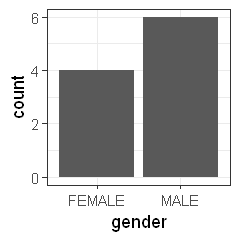

In [27]:
# We can make a bar graph for the Frequency Table
# graph size
options(repr.plot.width = 2, repr.plot.height = 2)
# Graph
bar.plot <- ggplot(df_survey) + 
    geom_bar(aes(x=gender)) + 
    theme_bw()
print(bar.plot)

### Using R Functions to Generate Multiple Frequency Tables

In [28]:
# There are Multiple Categorical Variables in the dataset
# Would be nice if we can generate frequency tables for all of them easily
# Let's create a list of  that are categorical
categorical.nomial.list <- c('gender', 'major', 'games.any', 'commute', 'econ')

In [29]:
# Let's Write a Function, not that we need to, but let's do it
# We can give the function any name, here: dplyr.freq.table
dplyr.freq.table <- function(df, cate.var.str){
    
    # A print Statement
    print(sprintf("From Dataset: %s, Freq. Table for Variable: %s", deparse(substitute(df)), cate.var.str))
    
    # Note below: !!sym(cate.var.str), because cate.var.str is string
    freq.table <- df %>%
        group_by(!!sym(cate.var.str)) %>%
        summarise (frequency.count = n()) %>%
        mutate(proportions = frequency.count / sum(frequency.count))    
    
    # Function returns
    return(freq.table)
}

# Let's call test this function and generate our earlier table
dplyr.freq.table(df = df_survey, cate.var.str = 'gender')

[1] "From Dataset: df_survey, Freq. Table for Variable: gender"


gender,frequency.count,proportions
FEMALE,4,0.4
MALE,6,0.6


In [30]:
# Let's Now Use our function to generate Multiple Frequency Tables
# We will first use a explicit loop
for (ctr in seq_along(categorical.nomial.list)) {
    freq.table <- dplyr.freq.table(df = df_survey, cate.var.str = categorical.nomial.list[ctr])
    print(freq.table)
}

[1] "From Dataset: df_survey, Freq. Table for Variable: gender"
# A tibble: 2 x 3
  gender frequency.count proportions
  <fct>            <int>       <dbl>
1 FEMALE               4         0.4
2 MALE                 6         0.6
[1] "From Dataset: df_survey, Freq. Table for Variable: major"
# A tibble: 5 x 3
  major           frequency.count proportions
  <fct>                     <int>       <dbl>
1 CONSUMERSCIENCE               1         0.1
2 ECON                          6         0.6
3 HEALTH                        1         0.1
4 HUMANRESOURCE                 1         0.1
5 PSYCH                         1         0.1
[1] "From Dataset: df_survey, Freq. Table for Variable: games.any"
# A tibble: 2 x 3
  games.any      frequency.count proportions
  <fct>                    <int>       <dbl>
1 Has.Attended                 4         0.4
2 Never.Attended               6         0.6
[1] "From Dataset: df_survey, Freq. Table for Variable: commute"
# A tibble: 1 x 3
  commute frequency

### Using Lapply to Generate Multiple Frequency Tables with a Single Line

In [31]:
# We will now use lapply, the single line loop tool in R
# Below, we are plugging each element of the list one by one into the function
# dplyr.freq.table, the first argument of the function is the dataset name
# which is fixed as df = df_survey
lapply(categorical.nomial.list,
       dplyr.freq.table,
       df = df_survey)

[1] "From Dataset: df_survey, Freq. Table for Variable: gender"
[1] "From Dataset: df_survey, Freq. Table for Variable: major"
[1] "From Dataset: df_survey, Freq. Table for Variable: games.any"
[1] "From Dataset: df_survey, Freq. Table for Variable: commute"
[1] "From Dataset: df_survey, Freq. Table for Variable: econ"


gender,frequency.count,proportions
FEMALE,4,0.4
MALE,6,0.6
major,frequency.count,proportions
CONSUMERSCIENCE,1,0.1
ECON,6,0.6
HEALTH,1,0.1
HUMANRESOURCE,1,0.1
PSYCH,1,0.1
games.any,frequency.count,proportions
Has.Attended,4,0.4


## Continuous/Quantitative

Graphically, we can show a continuous variable using a histogram. This could be test scores, temperatures, years in Houston, etc. This involves first creating a categorical/discrete variable based on the continuous variable. Since the underlying continuous variable is ordered (low to high temperature unless major which is not ordered), the categorical/discrete variable we generate is an ordered categorical variable (majors could be called unordered categorical variable). 

### Histogram with Lapply
To generate the histogram, we:
1. Make sure that all observations belongs to one category
    + no observations belonging to no categories
    + each observation only belongs to one category
2. Each category is equidistance along the continuous variable's original scale. 
3. Then we create a bar graph where each bar is a category, and the height of the bar represents the number of observations within that category. 

In [32]:
# We will write a histogram function
ggplot.histogram <- function(df, cts.var.str){    
    
    # Figure Size
    options(repr.plot.width = 4, repr.plot.height = 3)
    
    # Figure Title
    title <- sprintf("Histogram for %s in %s", cts.var.str, deparse(substitute(df)))
    
    # We have in our 10 student survey only 10 observations
    # We can still generate a histogram for our continuous variables
    # Will only use three bins
    histogram.3bins <- ggplot(df_survey, aes(x=!!sym(cts.var.str))) +
      geom_histogram(bins=3) +
      labs(title = paste0(title),
           caption = 'In Class Survey of 10 Students\n3 bins') +
      theme_bw()
    
    # obtain the data in the plot
    plot_data <- ggplot_build(histogram.3bins)
    # the dataframe below contains all the information for the histogram
    # bins and number of observations in each bins
    plot_dataframe <- plot_data$data[[1]]
    
    # return outputs
    return(list(gghist=histogram.3bins, hist.df=plot_dataframe))
}

[[1]]
[[1]]$gghist

[[1]]$hist.df
  y count  x xmin xmax    density ncount ndensity PANEL group ymin ymax colour
1 2     2  0 -5.5  5.5 0.01818182   0.25     0.25     1    -1    0    2     NA
2 0     0 11  5.5 16.5 0.00000000   0.00     0.00     1    -1    0    0     NA
3 8     8 22 16.5 27.5 0.07272727   1.00     1.00     1    -1    0    8     NA
    fill size linetype alpha
1 grey35  0.5        1    NA
2 grey35  0.5        1    NA
3 grey35  0.5        1    NA


[[1]]
[[1]]$gghist


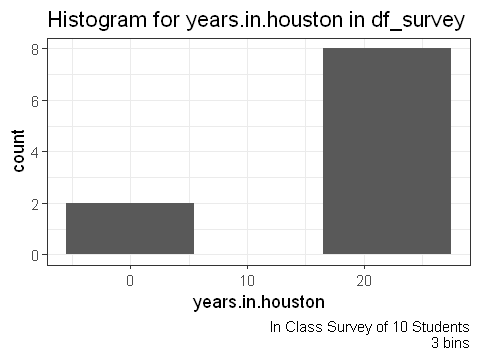


[[1]]$hist.df
  y count    x  xmin  xmax density ncount ndensity PANEL group ymin ymax colour
1 8     8  0.0 -6.25  6.25   0.064  1.000    1.000     1    -1    0    8     NA
2 1     1 12.5  6.25 18.75   0.008  0.125    0.125     1    -1    0    1     NA
3 1     1 25.0 18.75 31.25   0.008  0.125    0.125     1    -1    0    1     NA
    fill size linetype alpha
1 grey35  0.5        1    NA
2 grey35  0.5        1    NA
3 grey35  0.5        1    NA




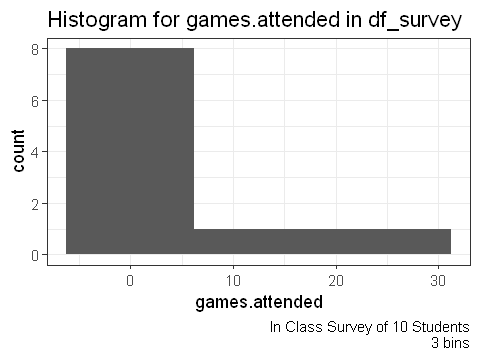

In [33]:
# Now the list of continuous Variables and calling the function with lapply
cts.list <- c('years.in.houston', 'games.attended')

# lapply
results <- lapply(cts.list,
       ggplot.histogram,
       df = df_survey)

# Show results
for (ctr in seq_along(cts.list)){
    print(results[ctr])
}
    